In [91]:
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense          # Hidden Layer & Output Layer

In [92]:
# Initialising the CNN
classifier = Sequential()

################### CNN - 1 ###################
# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

################### CNN - 2 ###################

#classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))

#################### Flattening Layer ################### 
classifier.add(Flatten())

#################### Step 4 - Full connection  ( Neural Netwokr) ###################
classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = 1, activation = 'sigmoid'))  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = probability

In [93]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [94]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               409728    
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 410,753
Trainable params: 410,753
Non-trainable params: 0
________________________________________________

In [95]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:/Users/USER/Desktop/Python Code/TensorFlow/CNN/cat_dog/dataset/training_set',
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'binary') # binary because we have 2 type = cat / dogs

test_set = test_datagen.flow_from_directory(r'C:/Users/USER/Desktop/Python Code/TensorFlow/CNN/cat_dog/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [96]:
8000/32  # each group will have 250 image unique

250.0

In [97]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [98]:
import warnings 
warnings.filterwarnings("ignore")

In [99]:
result=classifier.fit(training_set,
                         epochs=10, # iteration or repeat 
                         validation_data = test_set)

Epoch 1/10
250/250 [==============================] - 36s 141ms/step - loss: 0.6469 - accuracy: 0.6206 - val_loss: 0.6359 - val_accuracy: 0.6275
Epoch 2/10
250/250 [==============================] - 26s 105ms/step - loss: 0.5661 - accuracy: 0.7085 - val_loss: 0.5806 - val_accuracy: 0.7015
Epoch 3/10
250/250 [==============================] - 27s 108ms/step - loss: 0.5183 - accuracy: 0.7442 - val_loss: 0.5563 - val_accuracy: 0.7205
Epoch 4/10
250/250 [==============================] - 26s 104ms/step - loss: 0.4856 - accuracy: 0.7651 - val_loss: 0.5502 - val_accuracy: 0.7340
Epoch 5/10
250/250 [==============================] - 29s 114ms/step - loss: 0.4648 - accuracy: 0.7753 - val_loss: 0.5666 - val_accuracy: 0.7365
Epoch 6/10
250/250 [==============================] - 27s 108ms/step - loss: 0.4414 - accuracy: 0.7879 - val_loss: 0.5610 - val_accuracy: 0.7130
Epoch 7/10
250/250 [==============================] - 26s 105ms/step - loss: 0.4243 - accuracy: 0.8023 - val_loss: 0.5964 - val_ac

In [100]:
classifier.save('cat_dog_classifier.h5')

!pip install opencv-python-headless==4.5.2.52

In [101]:
from  keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [102]:
model=load_model("cat_dog_classifier.h5")

In [103]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))   # importing image is converted to 64*64
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = model.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))                # Display Image
    print('Probability',Probability)
    if Probability > 0.5:
        print("its a dog")
    else:
        print("its a cat")

In [104]:
import os 
os.chdir(r"C:\Users\User\Desktop\Python Code\TensorFlow\CNN\cat_dog")

1/1 [==============================] - 0s 68ms/step
Probability 0.27745023
its a cat


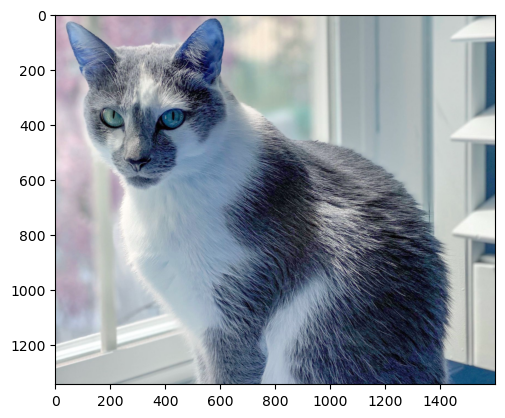

In [105]:
model_output("demo6.jpg")

1/1 [==============================] - 0s 22ms/step
Probability 0.4161724
its a cat


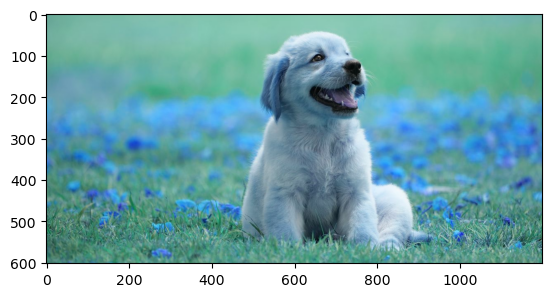

In [106]:
model_output("demo2.jpg")

1/1 [==============================] - 0s 26ms/step
Probability 0.5528744
its a dog


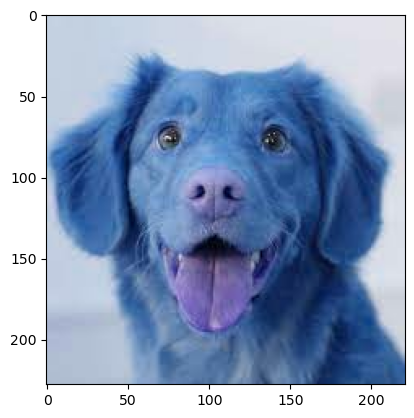

In [107]:
model_output("demo16.jpg")

1/1 [==============================] - 0s 19ms/step
Probability 0.9713638
its a dog


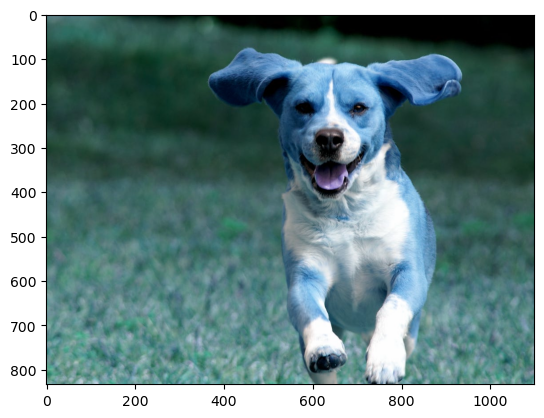

In [108]:
model_output("demo1.jpg")

1/1 [==============================] - 0s 20ms/step
Probability 0.008793735
its a cat


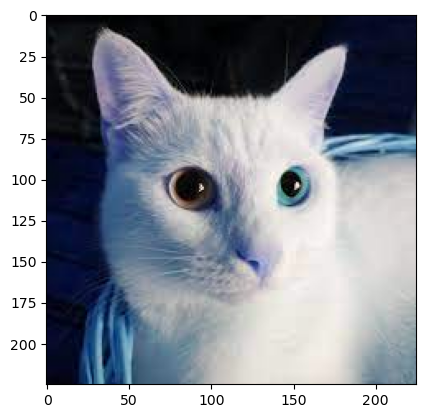

In [109]:
model_output("demo12.jpg")

1/1 [==============================] - 0s 19ms/step
Probability 0.6428966
its a dog


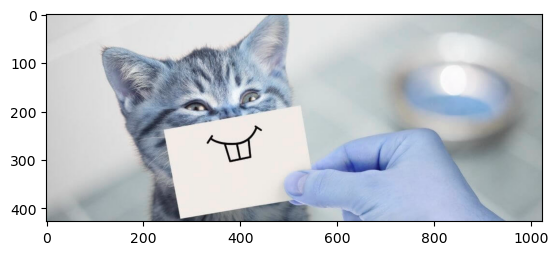

In [110]:
model_output("demo13.jpg")

1/1 [==============================] - 0s 30ms/step
Probability 0.8893706
its a dog


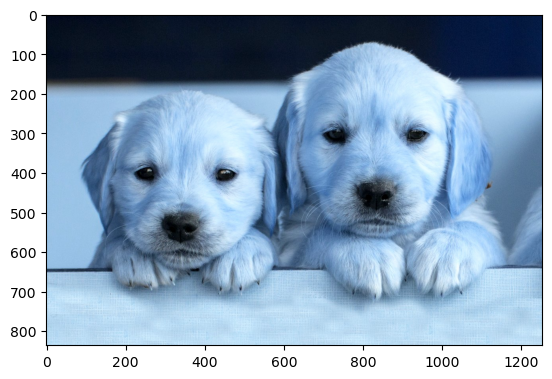

In [111]:
model_output("demo15.jpg")

1/1 [==============================] - 0s 21ms/step
Probability 0.100898825
its a cat


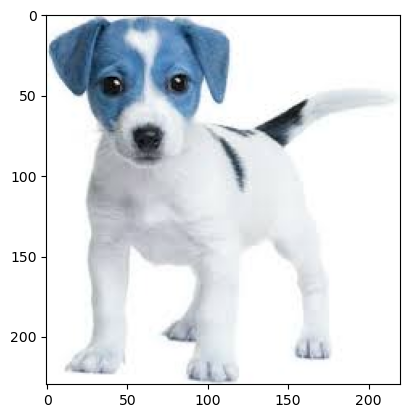

In [112]:
model_output("demo18.jpg")

# Finish

1/1 [==============================] - 0s 38ms/step
Probability 0.3628923
its a cat


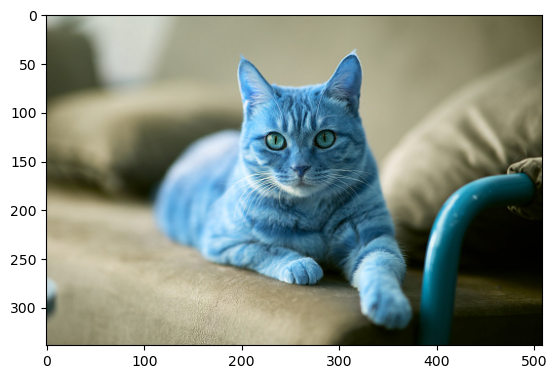

In [113]:
model_output("demo19.jpg")

1/1 [==============================] - 0s 21ms/step
Probability 0.096657984
its a cat


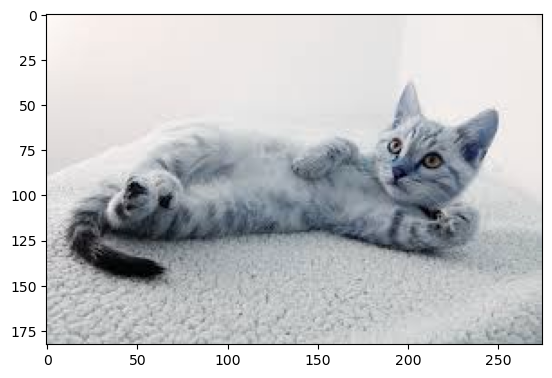

In [114]:
model_output("demo20.jpg")